# Forward Pass

A good reference for the basics of feed forward neural networks is the book [Michael Nielson](http://neuralnetworksanddeeplearning.com/)

We consider a generic feed forward neural network. The forward pass at the $l$-th layer is $a^{l-1} \rightarrow a^{l}$ 
$$\begin{align}
z_{ia}^l &= w_{i\alpha}^l a^{l-1}_{\alpha a} + b^{l-1}_i\otimes 1\!\!1_a  \\
a^l &= f(z^l)
\end{align}$$
where we have used the following notation for the indices:
$$\begin{align}
\alpha &= 1\,,\ldots \,, n_{l-1}  \quad {\rm size\ of}\ (l-1){\rm-th\ hidden\ layer}
\\
i &= 1\,,\ldots \,, n_l  \quad {\rm size\ of}\ l{\rm-th\ hidden\ layer} \\
a &= 1\,,\ldots \,, n_b \quad {\rm batch\ size}\,.
\end{align}$$
We have explicitly kept the batch index as we plan on programming this in python and want to be as precise as we can.

Under stochastic gradient descent (SGD) the weights are altered in each pass by
$$ \begin{align}
\Delta w = -\eta \frac{\partial L}{\partial w^l}
\end{align}$$
where $\eta<1$ is the learning rate and $L$ is the loss function.

We can use the chain rule to compute $\Delta w$:
$$ \begin{align}
\frac{\partial L}{\partial w^l_{i\alpha}} &= \sum_{a}\frac{\partial L}{\partial z^l_{ia}}\frac{\partial z^l_{ia}}{\partial w^l_{i\alpha}} \\
&= \sum_a \delta^l_{ia} a^{l-1}_{\alpha a}
\end{align}$$
where the error at layer $l$ is defined as
$$ \delta^l_{ia} = \frac{\partial L}{\partial z^l_{ia}} = \frac{\partial L}{\partial a^l_{ia}} f'(z^l_{ia})$$

To proceed we need to provide a way to compute $\delta^l$ at each layer. This requires another use of the chain rule:
$$\begin{align}
\frac{\partial L}{\partial a^{l-1}_{\alpha a}} &= \sum_i \frac{\partial L}{\partial z^{l}_{ia}}\frac{\partial z^{l}_{ia}}{\partial a^{l-1}_{\alpha a}} \\
&= \sum_i \delta^{l}_{ia} w^{l}_{i\alpha}
\end{align}$$

In summary we have
$$\begin{align}
\delta^{l-1}_{\alpha a}&= &= {\Big [}\sum_i \delta^{l}_{ia} w^{l}_{i\alpha} {\Big ]}f'(z^{l}_{\alpha a})
\end{align}$$

In index-free notation we write this as
$$\begin{align}
\delta^{l-1} =  (w^{l}_{i\alpha})^T \delta^{l} \odot f'(z^l)
\end{align}$$

So we see that to compute the backward pass at the $l$-th layer we require $(\delta^{l+1}, w^{l+1}, z^l)$ from the subsequent layer as well as $a^{l-1}$ from the previous layer.

## Boundary Condition: Regression

In regression, the final activation function is the identity and the loss function is taken to be either Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). In the Michael Nielson book it is claimed that the loss function must be of the form $L=\sum_a L_a$ where $L_a$ is the loss for a a single sample. This assumption is satisfied by MSE but not by RMSE, yet RMSE will work fine for our derivation.

$$\begin{align}
L &= \sqrt{\frac{1}{n_b}\sum_{a=1}^{n_b} (a^L_a - y_a)^2}
\end{align}$$

The error at the last layer is
$$\begin{align}
\delta^L_{ia} &= \frac{\partial L}{\partial a^L_{ia}} \\
&= \frac{a^L_{ia}-y_{ia}}{L}
\end{align}$$


# Linear Data plus Noise

In [56]:
import os
ROOT_DIR = '/Users/halmagyi/Documents/MachineLearning/ML_Notes/NeuralNetworks_Numpy/nnets_numpy'
os.chdir(ROOT_DIR)

In [92]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from src.functions import rmse, mse

from src.models import FeedForwardModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(100, 1)
(100, 1)


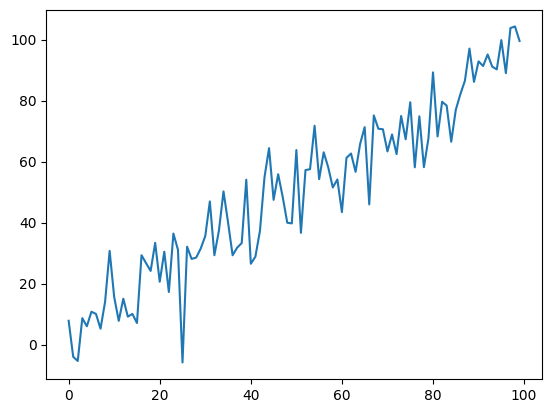

In [93]:
########
# data
########
data_size = 100
data = np.array(list(range(0, data_size))).reshape(data_size,1)

mu, sigma = 0, 10
noise = np.random.default_rng().normal(loc=mu, scale=sigma, size=data_size).reshape(data_size,1)

y_true = data + noise

print(data.shape)
print(y_true.shape)
plt.plot(data, y_true)
plt.show()

In [98]:
########
# architecture
########
layer_sizes = [100, 1]
input_size = 1
            
model = FeedForwardModel(layer_sizes, input_size=input_size, loss_fn='mse', alpha=0.01)
model.initialize_weights()

########
# training
########

learning_rate = 0.0001
epochs = 30
model.train(data=data, y_true=y_true, learning_rate=learning_rate, epochs=epochs)

num_samples: 100
epoch: 0, loss: 561.0385454424371, time elapsed: 0.0008921623229980469

num_samples: 100
epoch: 1, loss: 38235.40843513428, time elapsed: 0.0013003349304199219

num_samples: 100
epoch: 2, loss: 19481.03901912276, time elapsed: 0.0015492439270019531

num_samples: 100
epoch: 3, loss: 754.2715570858916, time elapsed: 0.0017821788787841797

num_samples: 100
epoch: 4, loss: 414.0693592555973, time elapsed: 0.002010345458984375

num_samples: 100
epoch: 5, loss: 195.3516802903098, time elapsed: 0.0022351741790771484

num_samples: 100
epoch: 6, loss: 101.50776964298277, time elapsed: 0.002537250518798828

num_samples: 100
epoch: 7, loss: 76.85964257230779, time elapsed: 0.0029213428497314453

num_samples: 100
epoch: 8, loss: 72.96312957917708, time elapsed: 0.0031762123107910156

num_samples: 100
epoch: 9, loss: 72.68860275155933, time elapsed: 0.003408193588256836

num_samples: 100
epoch: 10, loss: 72.76109546356163, time elapsed: 0.0036363601684570312

num_samples: 100
epoch

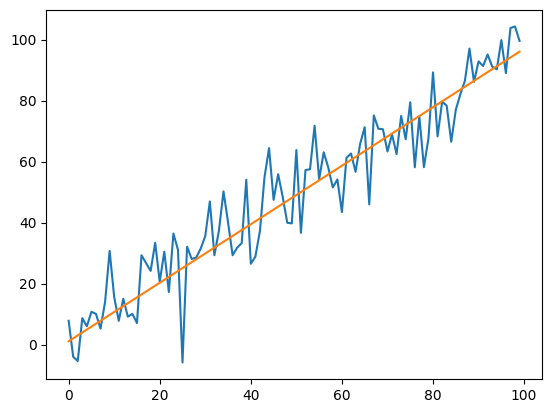

In [100]:
########
# Visualizing the result
########
# print(f"model.layers[0].W, {model.layers[0].W}")
# print(f"model.layers[0].b, {model.layers[0].b}")
y_pred = model.forward_pass(data)
plt.plot(data, y_true)
plt.plot(data, y_pred)
plt.show()

# Sine Function Approximation

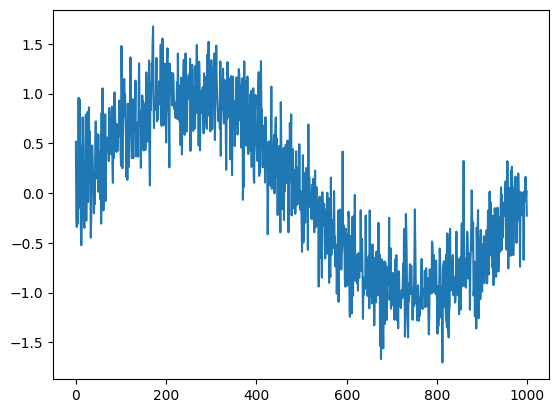

In [125]:
data_size = 1000
data = np.array(list(range(0, data_size))).reshape(data_size,1)

mu, sigma = 0, 0.3
noise = np.random.default_rng().normal(loc=mu, scale=sigma, size=data_size).reshape(data_size,1)

y_true = np.array([np.sin(2* np.pi * x /data_size) for x in data]).reshape(data_size,1)
y_true = y_true + noise

plt.plot(data, y_true)
plt.show()

In [135]:
########
# architecture
########
layer_sizes = [100,100,100,1]
loss_fn = 'rmse'
alpha = 0.0000001

model = FeedForwardModel(layer_sizes, input_size=1, loss_fn=loss_fn, alpha=alpha)
model.initialize_weights()

########
# training
########

learning_rate = 0.000001
epochs = 50
model.train(data=data, y_true=y_true, learning_rate=learning_rate, epochs=epochs)


# y_pred = model.forward_pass(data)
# L = RMSE(y_pred, y_true)
# print('L', L)


num_samples: 1000
epoch: 0, loss: 168.42422125855208, time elapsed: 0.004994869232177734

num_samples: 1000
epoch: 1, loss: 160.48459426866535, time elapsed: 0.009808778762817383

num_samples: 1000
epoch: 2, loss: 152.70573889220904, time elapsed: 0.014262914657592773

num_samples: 1000
epoch: 3, loss: 145.16200061068827, time elapsed: 0.01780986785888672

num_samples: 1000
epoch: 4, loss: 137.6551574631578, time elapsed: 0.02233290672302246

num_samples: 1000
epoch: 5, loss: 130.16450988124956, time elapsed: 0.027280807495117188

num_samples: 1000
epoch: 6, loss: 122.69396574337505, time elapsed: 0.03177785873413086

num_samples: 1000
epoch: 7, loss: 115.2702445249368, time elapsed: 0.03551483154296875

num_samples: 1000
epoch: 8, loss: 107.82368320516184, time elapsed: 0.039830923080444336

num_samples: 1000
epoch: 9, loss: 100.42664465666348, time elapsed: 0.043341875076293945

num_samples: 1000
epoch: 10, loss: 93.05295664082041, time elapsed: 0.048146724700927734

num_samples: 100

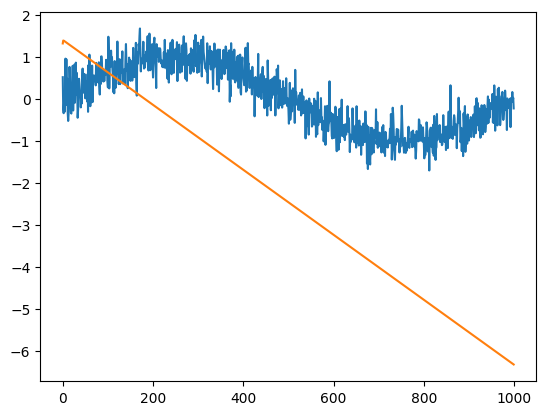

In [136]:
y_pred = model.forward_pass(data)
plt.plot(data, y_true)
plt.plot(data, y_pred)
plt.show()

In [110]:
rmse(y_pred, y_true)

0.059509404174667734

In [121]:
np.sqrt(np.sum(len(data)**(-1) *(y_pred - y_true)**2))

1.8818525939148265

In [123]:
y_pred.shape[0]

1000

In [124]:
num_samples = y_pred.shape[0]
num_samples**(-1) * np.sum((y_pred - y_true)**2)**(1/2)


0.059509404174667734